In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('Data/Wimbledon_featured_matches.csv')

def divide_by_matches(df):
    return [df[df['match_id'] == i] for i in df['match_id'].unique()]

def divide_by_sets(match_df):
    return [match_df[match_df['set_no'] == i] for i in match_df['set_no'].unique()]

def divide_by_games(set_df):
    return [set_df[set_df['game_no'] == i] for i in set_df['game_no'].unique()]

def match_winner(match):
    last_row = match.iloc[-1]
    if last_row["p1_sets"] == last_row["p2_sets"]:
        return last_row["set_victor"]
    if last_row["p1_sets"] > last_row["p2_sets"]:
        return 1
    else:
        return 2

matches_df = divide_by_matches(df)

In [62]:
# plot the array of DataFrames

def plot_matches(set_df):
    fig, ax = plt.subplots(2,2, figsize=(20, 10))
    for i in range(len(set_df)):
        # lineplot of 'p1_games' and 'p2_games' vs 'time_elapsed'
        sns.lineplot(x='elapsed_time', y='p1_games', data=set_df[i], ax=ax[i//2, i%2], label='p1_games')
        sns.lineplot(x='elapsed_time', y='p2_games', data=set_df[i], ax=ax[i//2, i%2], label='p2_games')
        # Set labels and title
        ax[i//2, i%2].set_xlabel('Time Elapsed (min)')
        ax[i//2, i%2].set_ylabel('Games')
        ax[i//2, i%2].set_title(f'Match {i+1} (Winner: {match_winner(set_df[i])})')

plot_matches(divide_by_sets(matches_df[0])[0])


KeyError: 'set'

Text(0.5, 1.0, 'Points won by each player winner 1')

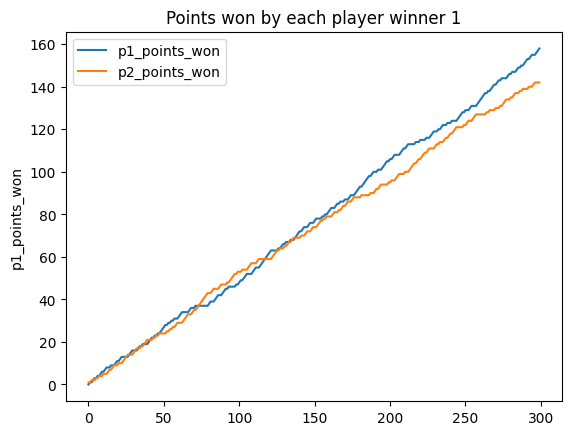

In [46]:
# plot 
sns.lineplot(data=match0["p1_points_won"], label="p1_points_won")
sns.lineplot(data=match0["p2_points_won"], label="p2_points_won")
plt.title(f"Points won by each player winner {match_winner(match0)}")
